<a href="https://colab.research.google.com/github/wannaBpark/2023S-Ajou-ML/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2

이번 과제에서는 대출의 승인 여부(Status)를 예측하는 데이터셋을 사용합니다.
<br>
HW1에서 제공한 데이터셋과는 다른 데이터셋입니다. bb에 업로드된 train.csv를 사용하여 과제를 진행해주세요.

[원본 데이터셋 링크](https://www.kaggle.com/datasets/mirzahasnine/loan-data-set?select=loan_train.csv)

## 주의
✋ 작성한 모든 코드에 주석을 작성할 것
<br>
✋ 이번 과제에서는 보고서 제출 X, 다만 문제 풀이 파일을 제출해야 함!

## 코랩 연결 및 라이브러리 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Machine_Learning/

/content/drive/MyDrive/Machine_Learning


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [4]:
df = pd.read_csv('./train.csv') # 제공/된 train.csv 사용 # 환경에 맞게 path 조절 가능

In [5]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [6]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,458300,0.0,13300000,360.0,0.0,Semiurban,N


In [7]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


## 간단한 EDA

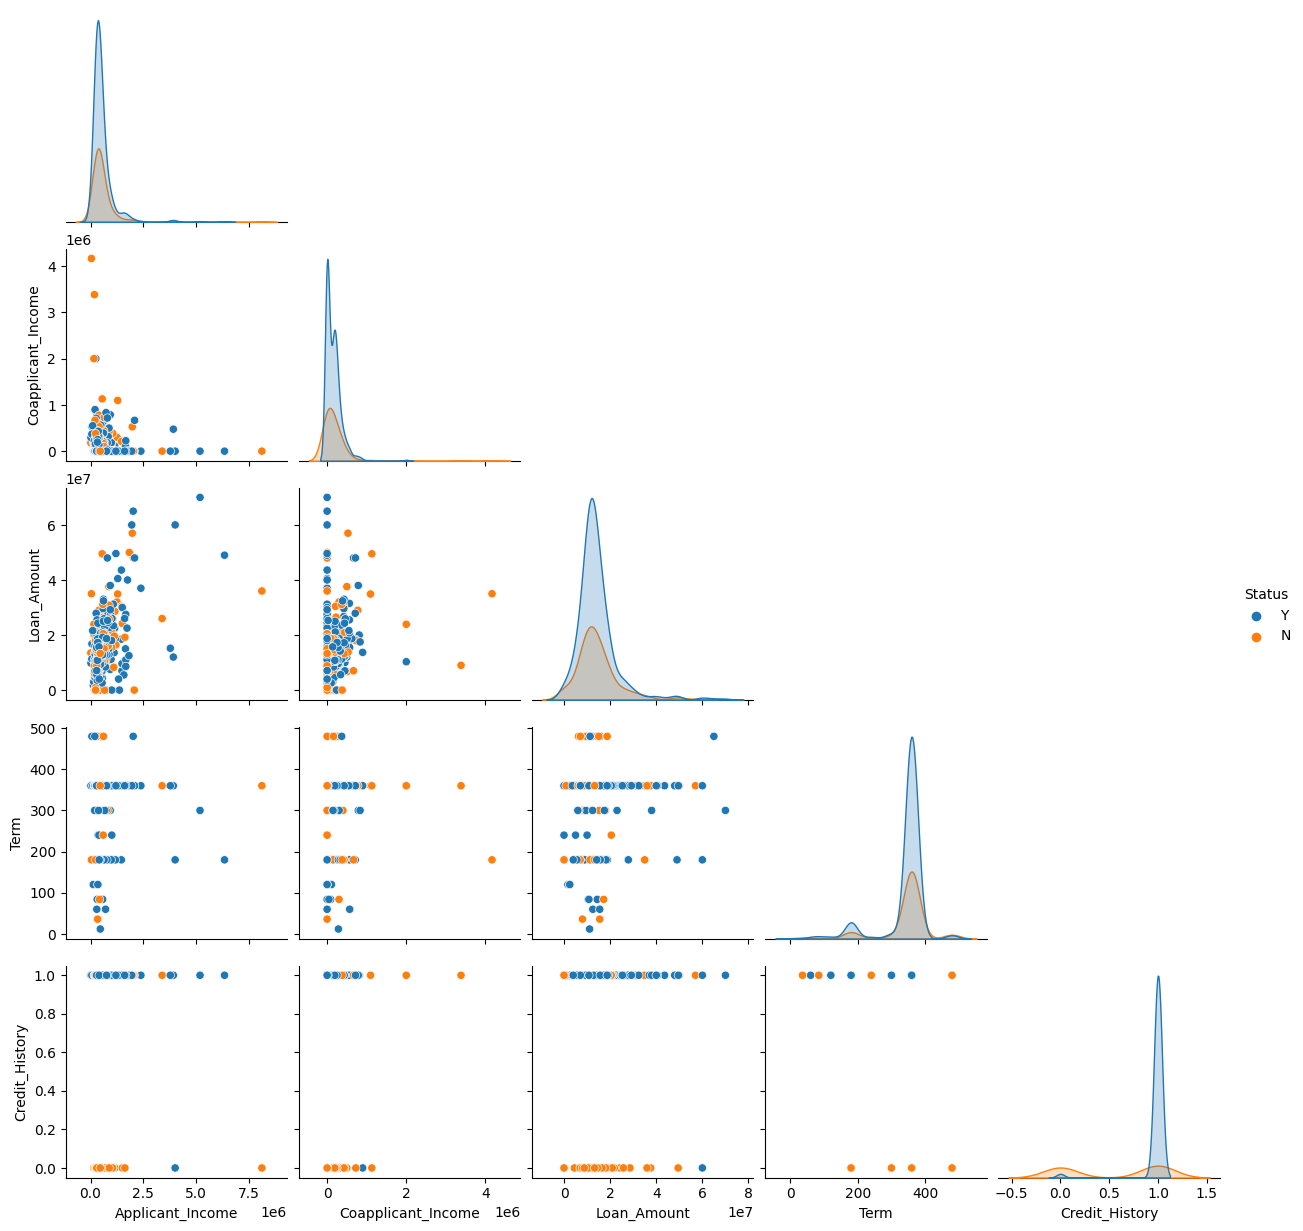

In [9]:
sns.pairplot(df,corner=True,hue='Status') # 이 데이터의 타겟 변수(예측하고자 하는 변수)는 'Status'입니다

<Axes: >

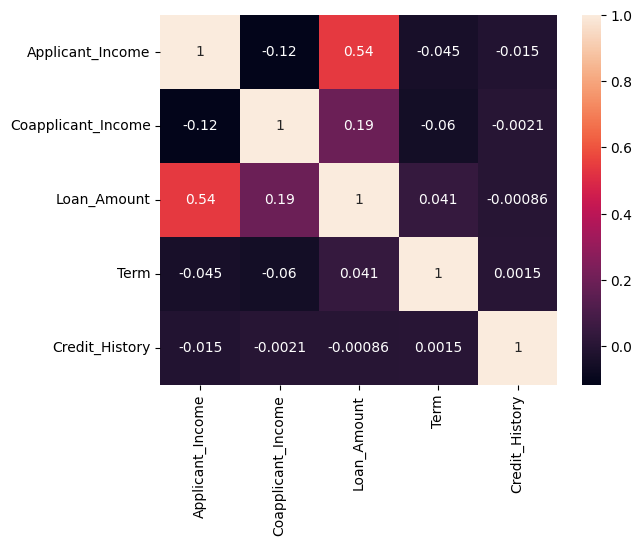

In [10]:
sns.heatmap(df.corr(),annot=True) # numerical feature들끼리의 correlation

## 결측치 확인

In [11]:
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

## 문제1: Categorical feature missing value drop
categorical feature에서 결측값이 있는 row를 삭제하세요.  
참고) sklearn 패키지에서 제공하는 imputer를 사용하면 최빈값으로 categorical feature의 결측 값도 채울 수 있으나, 편의 상 결측값이 있는 행을 삭제하겠습니다.

In [12]:
## 문제 1 ##
# 코드 작성
cat_columns_list = list(df.select_dtypes(include='object').columns)
for li in cat_columns_list: #categorical feature 리스트 순회
  df.dropna(subset=[li]) # 결측값이 있는 row 삭제
df.dropna(subset = ['Credit_History'], inplace = True) # 추가로 Credit_History 열에서 결측값 있는 행 삭제
##########

## 문제2: Label Encoding
모든 categorical feature들을 Label Encoding하여 numerical feature로 바꾸세요.
* LabelEncoder()를 사용하세요

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
categorical = list(df.select_dtypes(include='object').columns) # categorical features들의 column name 모음

In [15]:
## 문제 2 ##
# 코드 작성
le = LabelEncoder()
for col in categorical:
  df[col] = le.fit_transform(df[col]) # categorical feature 리스트 순회 및 numercial로 바꿈
##########

In [16]:
df # categorical -> numerical 로 바뀌었는지 확인

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900,0.0,15000000,360.0,1.0,2,1
1,1,1,1,0,0,458300,150800.0,12800000,360.0,1.0,0,0
2,1,1,0,0,1,300000,0.0,6600000,360.0,1.0,2,1
3,1,1,0,1,0,258300,235800.0,12000000,360.0,1.0,2,1
4,1,0,0,0,0,600000,0.0,14100000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,290000,0.0,7100000,360.0,1.0,0,1
610,1,1,3,0,0,410600,0.0,4000000,180.0,1.0,0,1
611,1,1,1,0,0,807200,24000.0,25300000,360.0,1.0,2,1
612,1,1,2,0,0,758300,0.0,18700000,360.0,1.0,2,1


## 문제 3: KNN imputer
위에서 이 데이터셋의 numberical feature에도 결측치가 있음을 확인했습니다.   
categorical feature에서는 결측치가 있는 행을 drop하였지만 numerical feature 중 결측치가 있는 'Term', 'Credit_History'열에 대해서 KNN imputer를 사용하여 결측치를 채워봅시다.

### 문제 3-1
주어진 코드틀에 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 코드를 작성하세요.  
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

### 문제 3-2
주어진 코드틀에서 k개의 값을 보고 평균을 내어 결측값을 결정하는 코드를 작성하세요.
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

In [17]:
import tqdm

In [18]:
class Knn_imputer():
  def __init__(self, n_neighbors): 
        
    ## 생성자로 최근접 이웃수(n_neighbors)를 입력 받습니다.
    self.k = n_neighbors    
  
  ## knn 은 lazy learning 입니다.
  def fit(self,X):
      self.X = X
  
  def predict(self, X, feat_name): # feat_name: KNN imputer를 사용하려는 feature 명

    for i in tqdm.tqdm(range(len(X))):
     if pd.isnull(X[feat_name].iloc[i]): # feat_name 열에 있는 결측값 확인

        distance = self.dist(X, X.iloc[i], feat_name) # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 함수
        sorted_dist = sorted(distance.items(), key=lambda x: x[1]) # distance 를 sorting 하기

         ################  문제 3-2  ####################
         # k개의 "feat_name" 값을 보고 평균 내어 값을 결정하기
         # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
         # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
        ################ 코드 시작  #####################
        sorted_kDist = []
        avg = 0
        for j in range(self.k): # k개의 가장 가까운 인덱스 순회
          idx = sorted_dist[j][0]
          sorted_kDist.append(X[feat_name].iloc[idx]) #해당 인덱스의 'Term'값 추출 및 배열에 추가
        avg = np.mean(sorted_kDist) # k개의 가장 가까운 sample의 열 값들(배열의) 평균
        
        self.X[feat_name].iloc[i] = avg # k개의 평균 대입
        ################ 코드 끝  ######################
        ##############################################
      
  
  def dist(self, X, y, feat_name): # feat_name: KNN imputer를 사용하려는 feature 명
    num_train = X.shape[0]

    X = X.drop([feat_name], axis=1)
    y = y.drop([feat_name])
    dist_dict = {} ## {index : distance} 형태

    for i in range(num_train):
    ################  문제 3-1  ####################
    # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하기
    # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
    # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
    ################ 코드 시작  #####################
      cur_diff = np.array([])
      cur_diff = self.X.iloc[i] - y # 결측값이 있는 행 데이터와 데이터프레임 X의 행의 차이 구함
      cur_dist= np.dot(cur_diff, cur_diff.T)
      dist_dict[i]= (cur_dist) # 이를 제곱한 값(거리)를 (인덱스 : 거리) 의 형식으로 삽입
    ################ 코드 끝  ######################
    ##############################################
    return dist_dict


In [19]:
normalized_df=(df-df.mean())/df.std()
# 아래 숫자는 변경하셔도 상관 없습니다.
imputer = Knn_imputer(5)
imputer.fit(normalized_df)
  
#test set에 대해 predict를 진행합니다.
imputer.predict(normalized_df, 'Term')
df['Term'] = normalized_df['Term']

100%|██████████| 564/564 [00:19<00:00, 29.30it/s]


In [20]:
normalized_df.isnull().sum() # 결측치가 채워졌는지 확인

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

## 문제 4: correlation
DataFrame df에 대해서 correlation heatmap을 그린 후, Status에 가장 영향을 주는 feature는 무엇인지 서술하세요

* Status에 가장 영향을 주는 feature에 대한 서술
: 'Credit_History' feature로, correlation 값이 가장 크다.



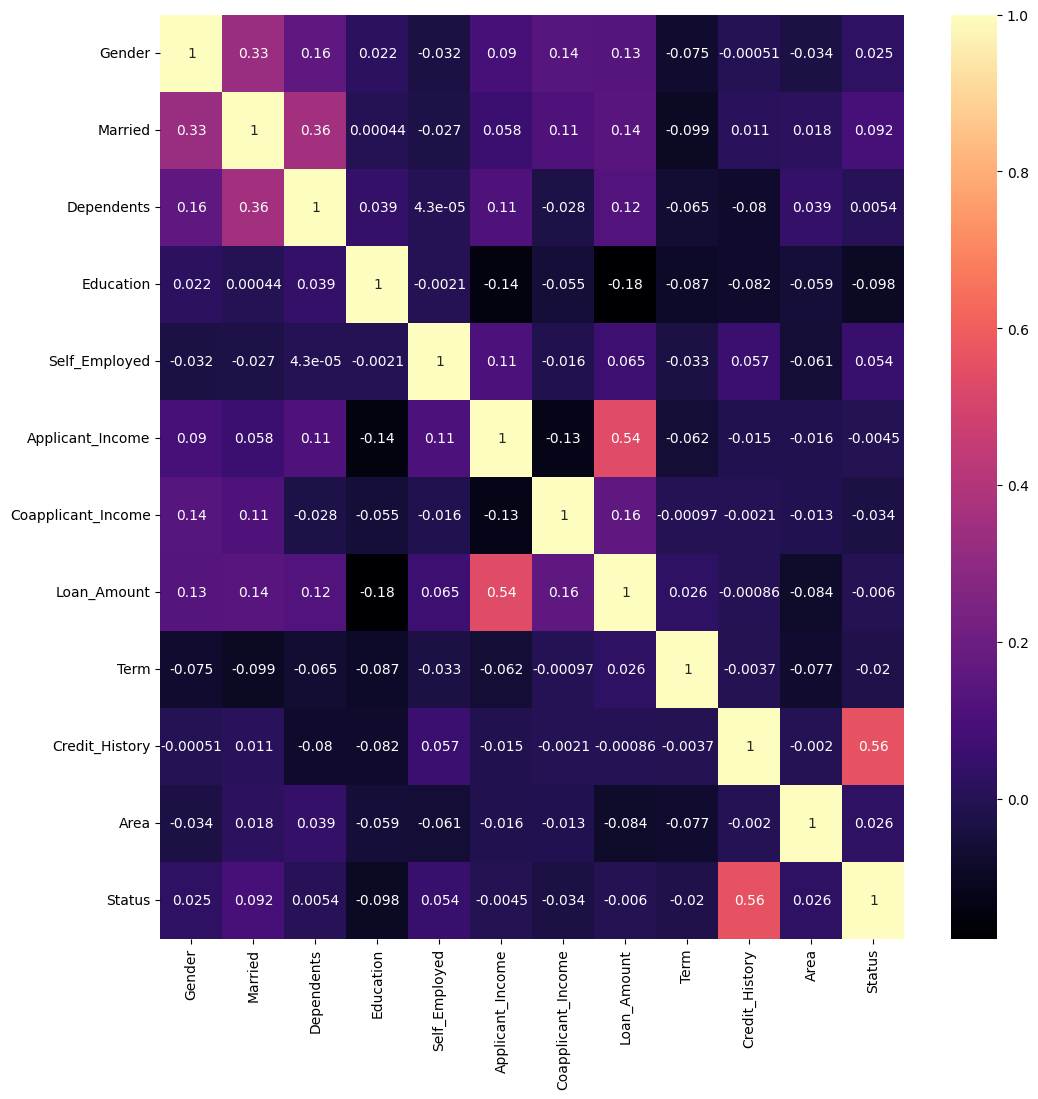

In [21]:
plt.figure(figsize = (12,12)) # figure 사이즈 조절

## 문제 4 ##
# 코드 작성
correlation = df.corr() # correalation 추출
sns.heatmap(correlation, annot=True, cmap='magma') # correlation heatmap 그리기기 
plt.show()
############

## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.

In [ ]:
from sklearn.model_selection import train_test_split

X = normalized_df.drop('Status', axis=1) # target feature가 Status(대출의 승인 여부)
y = normalized_df['Status']
y=y.astype('int')
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

## 문제5: KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

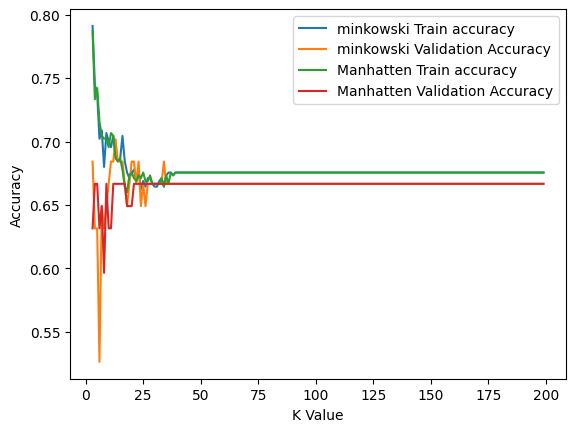

0.6491228070175439   13


In [38]:
### 문제 5 ###
### 코드 작성 ###
knn = KNeighborsClassifier()

best_p = None
best_k = 10
best_valid_acc = 0
_p = [1,2] #거리 척도 리스트 2개 : 유클리디안, 맨해튼
minkowski_train_accuracy = []
minkowski_valid_accuracy = []
man_train_accuracy = []
man_val_accuracy = []

k_vals = range(3, 200)
for k in k_vals:
  for cur_p in _p:
    #k=3~10까지의 범위와 거리척도 2개를 순회하는 KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=cur_p) 
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train) #training set 학습 결과
    y_valid_pred = knn.predict(X_val)  #validation set 학습 결과
    cur_train_score = metrics.accuracy_score(y_train, y_train_pred) # train score 저장
    cur_valid_score = metrics.accuracy_score(y_val, y_valid_pred) # valid score 저장
    if cur_p == 1:
      minkowski_train_accuracy.append(cur_train_score)
      minkowski_valid_accuracy.append(cur_valid_score)
    else :
      man_train_accuracy.append(cur_train_score)
      man_val_accuracy.append(cur_valid_score)

    #valid score를 가장 높게 만드는 파라미터 C와 거리척도 p를 찾는다.
    if best_valid_acc < cur_valid_score:
      best_k = k
      best_valid_acc = cur_valid_score
      best_p = cur_p

plt.plot(k_vals, minkowski_train_accuracy, label='minkowski Train accuracy')
plt.plot(k_vals, minkowski_valid_accuracy, label='minkowski Validation Accuracy')
plt.plot(k_vals, man_train_accuracy, label='Manhatten Train accuracy')
plt.plot(k_vals, man_val_accuracy, label='Manhatten Validation Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#위에서 구한 최적의 파라미터 k와 p를 이용해 test set을 예측하는 코드.
knn = KNeighborsClassifier(n_neighbors=best_k, weights='uniform', p=best_p) 
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred) ," " ,best_k)
################

**설명 작성**  
- 최적의 파라미터: K=13, test_accuracy : 0.6491228070175439 
- 설명:validation 정확도가 가장 높으면서 training accuracy도 증가하고 있게 하는, 그러한 값을 만드는 k 값중 가장 작은 값이 최적의 k값이다.

## 문제6 Cross validation with Linear SVM
### 6-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
    - C 이외의 하이퍼파라미터는 임의로 설정 가능
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 6-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
  - C 이외의 하이퍼파라미터는 임의로 설정 가능
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [25]:
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [ ]:
## 문제 6-1 ##
# 코드 작성
X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size=0.1)
svm = SVC(kernel='linear', random_state=42)
Clist = [0.001, 0.01, 0.012, 0.1]
best_C = None
best_accuracy = 0
mean_accuracy = []
fold_accuracy = []
kf = KFold(n_splits=5, shuffle=True)
for C in Clist:
    svm.set_params(C=C)  # C 값을 변경하여 모델 인스턴스 갱신
    # cur_fold_scores = []
    fold_score = cross_val_score(svm, X_tmp, y_tmp, cv=kf) # 5-fold cv 수행
    mean_accuracy.append(fold_score.mean()) # C 값 별 평균 정확도 저장
    if best_accuracy < fold_score.mean():
      best_accuracy = fold_score.mean()
      best_C = C

# for i in range(5):
#   plt.plot(Clist, fold_accuracy[i], label=f'Fold {i+1}')
plt.plot(Clist, mean_accuracy, label='Mean Accuracy')
# plt.plot(Clist, fold_accuracy, label='Validation Accuracy')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

svm.set_params(C=C)  # 최적의 c값으로 linear svm 세팅
svm.fit(X_tmp, y_tmp)
y_test_pred = svm.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred) ," " ,best_C)
############

**설명 작성**  
- 최적의 파라미터:
- 설명:

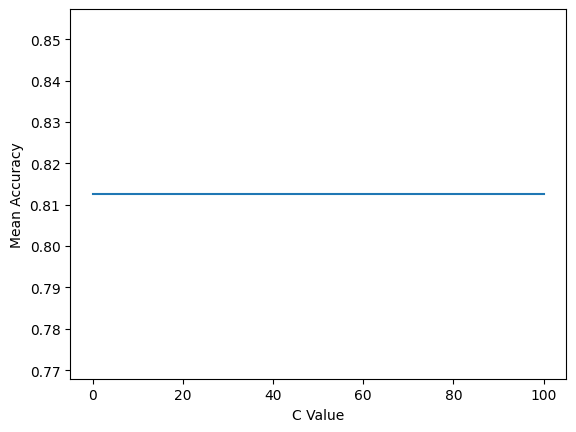

Best C: 0.01
Test Accuracy: 0.6826241134751773


In [27]:
## 문제 6-2 ##
# 코드 작성
X_tmp, _, y_tmp, _ = train_test_split(X, y, test_size=0.1) #test data제외한 90%의 X_tmp, y_tmp 데이터 분리리
loocv = LeaveOneOut()
Clist = [0.01, 0.1, 100]  # 선택할 C 파라미터 리스트
mean_accuracies = []  # 평균 정확도를 저장할 리스트

for C in Clist:
    accuracies = []  # 현재 C 값에 대한 각 LOOCV의 정확도를 저장할 리스트
    
    for train_index, test_index in loocv.split(X_tmp):
        X_tmp_train, X_tmp_test = X_tmp.iloc[train_index], X_tmp.iloc[test_index]
        y_tmp_train, y_tmp_test = y_tmp.iloc[train_index], y_tmp.iloc[test_index]
        
        # SVM 모델 생성 및 loocv의 training set에 학습
        svm = SVC(kernel='linear', C=C)
        svm.fit(X_tmp_train, y_tmp_train)
        
        # 테스트 데이터에 대한 정확도 계산 및 저장
        accuracy = svm.score(X_tmp_test, y_tmp_test)
        accuracies.append(accuracy)
    cur_mean_accuracy = np.mean(accuracies)
    mean_accuracies.append(cur_mean_accuracy)

# 그래프 그리기
plt.plot(Clist, mean_accuracies)
plt.xlabel('C Value')
plt.ylabel('Mean Accuracy')
plt.show()

# 최적의 파라미터와 테스트 데이터를 이용한 테스트 정확도 계산
best_C = Clist[np.argmax(mean_accuracies)]
svm_best = SVC(C=best_C)
svm_best.fit(X, y)
test_accuracy = svm_best.score(X, y)
print('Best C:', best_C)
print('Test Accuracy:', test_accuracy)
############

**설명 작성**  
- 최적의 파라미터: C = 1
- 설명:

## 문제7 Cross validation with SVM
### 7-1: k-fold
- 문제6-1 코드에서 kernel을 바꾸어 k-fold를 진행하세요
- C는 2로 설정하고 k=5로 설정합니다.

### 7-2: Leave One Out
- 문제6-2 코드에서 kernel을 바꾸어 Leave one out를 진행하세요
- C는 2로 설정합니다.

### 7-3: 데이터의 특성
문제 6의 결과와 7-1, 7-2의 결과를 비교하여 보았을 때 주어진 데이터는 어떤 관계인지 (선형, 비선형)인지 적고, 왜 그런지 그 이유를 서술하세요


In [28]:
## 문제 7-1 ##
# 코드 작성
X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size=0.1)
svm = SVC(kernel='linear', random_state=42)
cur_C = 2
accuracies = []
kf = KFold(n_splits=5, shuffle=True)
svm.set_params(C=cur_C)  # C 값을 변경하여 모델 인스턴스 갱신
for train_index, test_index in kf.split(X_tmp):
  X_tmp_train, X_tmp_test = X_tmp.iloc[train_index], X_tmp.iloc[test_index]
  y_tmp_train, y_tmp_test = y_tmp.iloc[train_index], y_tmp.iloc[test_index]
  # SVM 모델 생성 및 5-fold의 training set에 학습
  svm.fit(X_tmp_train, y_tmp_train)

  # 테스트 데이터에 대한 정확도 계산 및 저장
  accuracy = svm.score(X_tmp_test, y_tmp_test)
  accuracies.append(accuracy)
  cur_mean_accuracy = np.mean(accuracies)
mean_accuracies.append(cur_mean_accuracy)



print('Current C:', cur_C)
print('5 Fold Accuracy:', mean_accuracies[0])

# 테스트 데이터를 이용한 테스트 정확도 계산

svm_best = SVC(C=cur_C)
svm_best.fit(X_tmp, y_tmp)
test_accuracy = svm_best.score(X_test, y_test)
print('Current C:', cur_C)
print('Test Accuracy:', test_accuracy)
############

Current C: 2
5 Fold Accuracy: 0.8126232741617357
Current C: 2
Test Accuracy: 0.8947368421052632


In [29]:
## 문제 7-2 ##
# 코드 작성
X_tmp, _, y_tmp, _ = train_test_split(X, y, test_size=0.1) #test data제외한 90%의 X_tmp, y_tmp 데이터 분리리
loocv = LeaveOneOut()
Clist = [2]  # 선택할 C 파라미터 리스트
mean_accuracies = []  # 평균 정확도를 저장할 리스트
accuracies = []  # 현재 C 값에 대한 각 LOOCV의 정확도를 저장할 리스트

for train_index, test_index in loocv.split(X_tmp):
  X_tmp_train, X_tmp_test = X_tmp.iloc[train_index], X_tmp.iloc[test_index]
  y_tmp_train, y_tmp_test = y_tmp.iloc[train_index], y_tmp.iloc[test_index]
        
  # SVM 모델 생성 및 loocv의 training set에 학습
  svm = SVC(kernel='sigmoid', random_state=42, C=C)
  svm.fit(X_tmp_train, y_tmp_train)
        
  # 테스트 데이터에 대한 정확도 계산 및 저장
  accuracy = svm.score(X_tmp_test, y_tmp_test)
  accuracies.append(accuracy)
  cur_mean_accuracy = np.mean(accuracies)
mean_accuracies.append(cur_mean_accuracy)

cur_C = 2

print('Current C:', cur_C)
print('LOOCV Accuracy:', mean_accuracies[0])

# 테스트 데이터를 이용한 테스트 정확도 계산

svm_best = SVC(C=cur_C)
svm_best.fit(X_tmp, y_tmp)
test_accuracy = svm_best.score(X_test, y_test)
print('Current C:', cur_C)
print('Test Accuracy:', test_accuracy)
############

Current C: 2
LOOCV Accuracy: 0.7238658777120316
Current C: 2
Test Accuracy: 0.9122807017543859


**7-3 설명 작성**  
- 설명:

## 문제 8: Grid search
### 문제 8-1
주어진 param_grid에 대해서 RandomForestClassifier에 GridSearch cross validation(cv=5)을 수행하는 코드를 작성하고 best hyperparameter를 출력하세요.  
* 아래의 주어진 패키지를 사용합니다.



In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [31]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [32]:
## 문제 8-1 ##
## 코드 작성 ##
rf = RandomForestClassifier() # Random Forest 모델 인스턴스 불러옴
grid_search = GridSearchCV(rf, param_grid, cv=5) # GridSearch cross validion(cv=5), parm_grid, 모델 인자 설정
grid_search.fit(X,y)

best_parameters = grid_search.best_params_
print("best hyperparameter: ", best_parameters)
############

best hyperparameter:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}


### 문제 8-2
8-1에서 구한 best parameter를 사용하여 최종적인 RandomForestClassifier를 만든 후 train 데이터로 학습 후, `accuracy_score`를 사용하여 test accuracy를 출력하세요.

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
## 문제 8-2 ##
## 코드 작성 ##
rf = RandomForestClassifier(**best_parameters)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ",accuracy)
############

Test Accuracy:  0.9122807017543859
